In [ ]:
# https://developer.spotify.com/dashboard/668d89bbc6df4511ab0d73eeac7b3ae0/settings
# https://developer.spotify.com/documentation/web-api/reference/get-audio-features
# https://developer.spotify.com/documentation/web-api/concepts/scopes
# https://developer.spotify.com/documentation/web-api/reference/get-audio-analysis
# https://spotipy.readthedocs.io/en/2.22.1/#module-spotipy.client

In [2]:
scope = "user-read-private user-read-email user-top-read"
redirect_uri ='http://localhost:9000'

In [3]:
# tried to directly use spotify's api
import requests

params = {'client_id': cid, 'response_type': 'code', 'scope': scope, 'redirect_uri': redirect_uri}
r = requests.get('https://accounts.spotify.com/authorize?', params=params)

grant_type='authorization_code'
code='AQB8CPKsrh4GJplTFVVXX66EJu2-FxyJq_WNs4tL5lNLTkzDV06UrTbuzzXgNcUIJXUd3YK3Yj--bz_iaKGBHZIfrpGspHVNPEvvU27svse3WpkpWV1jZQ80w1Ud3kdQaciOFI4d0DxcQGEMSUTodJdfj1NptT5jzSmf5LYJBRm1AVXx1X03C42V5Mxq22hwvV3ybFY_4IF-KJ2y6Q'
headers = {'Authorization': 'Basic ' + str(cid) + ':' + str(secret)}
p = {'grant_type' : grant_type, 'code': code, 'redirect_uri': redirect_uri}
g = requests.post('https://accounts.spotify.com/api/token', params=p, headers=headers)
g

<Response [400]>

In [4]:
# use spotipy authentication
import spotipy
from spotipy.oauth2 import SpotifyOAuth

cred_manager = SpotifyOAuth(scope=scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)
sp = spotipy.Spotify(auth_manager=cred_manager)

In [5]:
print(sp.current_user())

{'display_name': 'anishachatty', 'external_urls': {'spotify': 'https://open.spotify.com/user/anisha.0701'}, 'href': 'https://api.spotify.com/v1/users/anisha.0701', 'id': 'anisha.0701', 'images': [{'url': 'https://i.scdn.co/image/ab67757000003b829cb8362c564b667261b1fd7d', 'height': 64, 'width': 64}, {'url': 'https://i.scdn.co/image/ab6775700000ee859cb8362c564b667261b1fd7d', 'height': 300, 'width': 300}], 'type': 'user', 'uri': 'spotify:user:anisha.0701', 'followers': {'href': None, 'total': 71}, 'country': 'US', 'product': 'premium', 'explicit_content': {'filter_enabled': False, 'filter_locked': False}, 'email': 'anishac.0701@gmail.com'}


In [13]:
# grab user's top tracks & their ids
results = sp.current_user_top_tracks(limit=50)
top_tracks = {}
for item in enumerate(results['items']):
    #print(item[1])
    track = item[1]['name']
    spotify_id = item[1]['id']
    top_tracks[spotify_id] = track
print(top_tracks)

{'7rEUuRanwV9piOwwPKxPIM': 'south to west', '2GAhgAjOhEmItWLfgisyOn': 'Low', '0VgkVdmE4gld66l8iyGjgx': 'Mask Off', '0UHB9METy4VCXNgkcGqHqS': 'Kiss It Better', '6Sq7ltF9Qa7SNFBsV5Cogx': 'Me Porto Bonito', '4s7QLoImIwmPi9L6dq1nVW': 'TSU', '0wshkEEcJUQU33RSRBb5dv': 'BackOutsideBoyz', '40iJIUlhi6renaREYGeIDS': 'Fair Trade (with Travis Scott)', '1lOe9qE0vR9zwWQAOk6CoO': 'Ransom', '5xP9lQYA8YQmQh6BOxcAnR': 'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)', '1xWkeSPhf3bZqHY7Ncz8vp': '500lbs', '4rmVZajAF7PkrCagGPHbqa': 'Sticky', '2L1OXzqVPpVxotHfLglUcB': 'Chauffeur', '5zncDH135tZLyMN09uDioD': 'Heart On My Sleeve', '6wWaVoUOzLQJHd3bWAUpdZ': 'Never Recover (Lil Baby & Gunna, Drake)', '2s4AcE9n80mSHl87lp4gIm': 'Wine Pon You (feat. Konshens)', '2vvktj9QlhYZI8ncv9uSt4': 'Rascal (Superstar)', '3HYw9gQIuoZvfGebOrKob5': 'Iced Out Gold Chain', '2KLwPaRDOB87XOYAT2fgxh': 'Pussy & Millions (feat. Travis Scott)', '37Nqx7iavZpotJSDXZWbJ3': 'Girls Want Girls (wit

In [54]:
# create list of ids
track_ids = []
song_names = []
for key in top_tracks:
    track_ids.append(key)
    song_names.append(top_tracks[key])
print(track_ids)
print(song_names)

['7rEUuRanwV9piOwwPKxPIM', '2GAhgAjOhEmItWLfgisyOn', '0VgkVdmE4gld66l8iyGjgx', '0UHB9METy4VCXNgkcGqHqS', '6Sq7ltF9Qa7SNFBsV5Cogx', '4s7QLoImIwmPi9L6dq1nVW', '0wshkEEcJUQU33RSRBb5dv', '40iJIUlhi6renaREYGeIDS', '1lOe9qE0vR9zwWQAOk6CoO', '5xP9lQYA8YQmQh6BOxcAnR', '1xWkeSPhf3bZqHY7Ncz8vp', '4rmVZajAF7PkrCagGPHbqa', '2L1OXzqVPpVxotHfLglUcB', '5zncDH135tZLyMN09uDioD', '6wWaVoUOzLQJHd3bWAUpdZ', '2s4AcE9n80mSHl87lp4gIm', '2vvktj9QlhYZI8ncv9uSt4', '3HYw9gQIuoZvfGebOrKob5', '2KLwPaRDOB87XOYAT2fgxh', '37Nqx7iavZpotJSDXZWbJ3', '1cKHdTo9u0ZymJdPGSh6nq', '2OrvozJS2qJnyB4q0ruOdA', '13gqtz2ra8KoYR7k55kfKE', '4CvTytBa0rfmQKii8JHCXa', '5mCPDVBb16L4XQwDdbRUpz', '6Xom58OOXk2SoU711L2IXO', '1xFfbxmfenEpn4WawGWXiA', '70pZIQqQ37SrNCADx0FiPN', '6K4Co1NQyOnoFEJMkZHkln', '5wG3HvLhF6Y5KTGlK0IW3J', '2HbKqm4o0w5wEeEFXm2sD4', '4loM16743hROPC6uIJG6wM', '4v1NdP9omUeesYvYrVAv2I', '3F5CgOj3wFlRv51JsHbxhe', '4T652DlATVHe0jdLKaN3Bw', '6dZ6qWl1e9GsMndBG7vqB9', '6ieWL5CLN9WdC875guWtMe', '4R67rQNSbbsR4TdUVOIdez', '3XiNC94b4T

In [16]:
# grabs top track features
features = sp.audio_features(tracks = track_ids)
print(features[0])

{'danceability': 0.884, 'energy': 0.675, 'key': 5, 'loudness': -7.209, 'mode': 0, 'speechiness': 0.185, 'acousticness': 0.134, 'instrumentalness': 0, 'liveness': 0.13, 'valence': 0.452, 'tempo': 133.963, 'type': 'audio_features', 'id': '7rEUuRanwV9piOwwPKxPIM', 'uri': 'spotify:track:7rEUuRanwV9piOwwPKxPIM', 'track_href': 'https://api.spotify.com/v1/tracks/7rEUuRanwV9piOwwPKxPIM', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7rEUuRanwV9piOwwPKxPIM', 'duration_ms': 122693, 'time_signature': 4}


In [17]:
import pandas as pd

In [34]:
features_df = pd.DataFrame(data=features)
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.884,0.675,5,-7.209,0,0.1850,0.1340,0.000000,0.1300,0.452,133.963,audio_features,7rEUuRanwV9piOwwPKxPIM,spotify:track:7rEUuRanwV9piOwwPKxPIM,https://api.spotify.com/v1/tracks/7rEUuRanwV9p...,https://api.spotify.com/v1/audio-analysis/7rEU...,122693,4
1,0.698,0.546,0,-7.234,0,0.0559,0.4250,0.003140,0.1600,0.335,145.044,audio_features,2GAhgAjOhEmItWLfgisyOn,spotify:track:2GAhgAjOhEmItWLfgisyOn,https://api.spotify.com/v1/tracks/2GAhgAjOhEmI...,https://api.spotify.com/v1/audio-analysis/2GAh...,181080,4
2,0.833,0.434,2,-8.795,1,0.4310,0.0102,0.021900,0.1650,0.281,150.062,audio_features,0VgkVdmE4gld66l8iyGjgx,spotify:track:0VgkVdmE4gld66l8iyGjgx,https://api.spotify.com/v1/tracks/0VgkVdmE4gld...,https://api.spotify.com/v1/audio-analysis/0Vgk...,204600,4
3,0.619,0.806,3,-4.800,0,0.0483,0.2720,0.000000,0.0671,0.877,95.000,audio_features,0UHB9METy4VCXNgkcGqHqS,spotify:track:0UHB9METy4VCXNgkcGqHqS,https://api.spotify.com/v1/tracks/0UHB9METy4VC...,https://api.spotify.com/v1/audio-analysis/0UHB...,253080,4
4,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,audio_features,6Sq7ltF9Qa7SNFBsV5Cogx,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...,178567,4


In [35]:
data = features_df.drop(columns=['id', 'uri', 'track_href', 'analysis_url', 'type']).to_numpy()

In [36]:
data[0]

array([ 8.84000e-01,  6.75000e-01,  5.00000e+00, -7.20900e+00,
        0.00000e+00,  1.85000e-01,  1.34000e-01,  0.00000e+00,
        1.30000e-01,  4.52000e-01,  1.33963e+02,  1.22693e+05,
        4.00000e+00])

In [59]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [41]:
# scale data points
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

NameError: name 'sns' is not defined

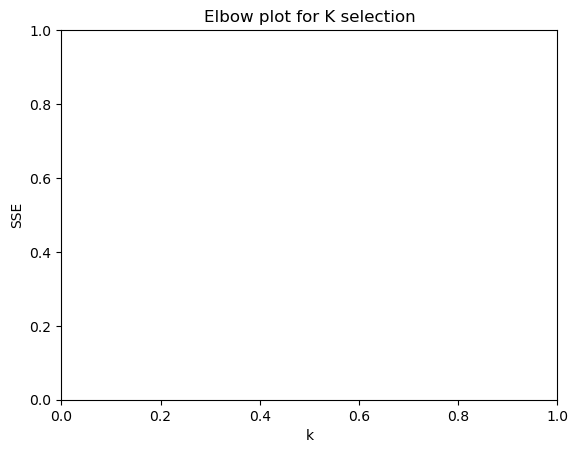

In [62]:
# determine number of clusters using elbow plot
sse = {}

for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(data)
    sse[i] = kmeans.inertia_
    
plt.title('Elbow plot for K selection')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
plt.show()

In [42]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [43]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [44]:
kmeans.cluster_centers_

array([[-0.37220725,  0.23183712,  0.0835766 ,  0.36960898, -0.14623173,
         0.29427968, -0.53221984, -0.1250921 ,  0.24304151, -0.32259242,
         0.64653814,  0.00817291,  0.        ],
       [ 0.14673073, -0.97186489,  0.2969866 , -1.0263997 ,  0.41535096,
        -0.45331073,  0.40827641,  0.29880524, -0.31826314, -0.32772434,
        -0.49997613,  0.01470222,  0.        ],
       [ 0.56482501,  0.92887132, -0.60673158,  0.72012624, -0.2983896 ,
         0.04404901,  0.51896669, -0.1730696 , -0.0452495 ,  1.15120138,
        -0.62461447, -0.03847386,  0.        ]])

In [51]:
clusters = kmeans.labels_
clusters

array([0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 2, 1, 0, 0], dtype=int32)

In [56]:
results = pd.DataFrame({'id': track_ids, 'song_name': song_names, 'cluster': clusters})
results

,id,song_name,cluster
0,7rEUuRanwV9piOwwPKxPIM,south to west,0
1,2GAhgAjOhEmItWLfgisyOn,Low,0
2,0VgkVdmE4gld66l8iyGjgx,Mask Off,0
3,0UHB9METy4VCXNgkcGqHqS,Kiss It Better,2
4,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,2
5,4s7QLoImIwmPi9L6dq1nVW,TSU,0
6,0wshkEEcJUQU33RSRBb5dv,BackOutsideBoyz,0
7,40iJIUlhi6renaREYGeIDS,Fair Trade (with Travis Scott),0
8,1lOe9qE0vR9zwWQAOk6CoO,Ransom,0
9,5xP9lQYA8YQmQh6BOxcAnR,Popular (with Playboi Carti & Madonna) - The I...,2
